# Section 2.2 Tutorial - scipy.signal.lfilter()

The scipy.signal.lfilter() function computes the output of a causal, LTI system for a given input when the system is specified by a linear constant-coefficient difference equation (See S&S 2nd Ed 2.4). Specifically, consider an LTI system satisfying the difference equation

Equation (2.7):
<center>$\displaystyle\sum_{k=0}^{K} a_ky[n-k] = \displaystyle\sum_{m=0}^{M} b_mx[n-m]$,</center>

where $x[n]$ is the system input and $y[n]$ is the system output. If x is a numpy array containing the input $x[n]$ on the interval $n_x \le n \le n_x + N_x - 1$ and the arrays a and b contain the coefficients $a_k$ and $b_m$, then scipy.signal.lfilter(b,a,x) returns the output of the causal LTI system satisfying

Equation (2.8):
<center>$\displaystyle\sum_{k=0}^{K} a(k+1)y[n-k] = \displaystyle\sum_{m=0}^{M} b(m+1)x[n-m]$.</center>

Note that $a(k+1)=a_k$ and $b(m+1) = b_m$, since scipy.signal.lfilter() requires that all vector indices begin at one. For example, to specify the system described by the difference equation $y[n] + 2y[n-1]=x[n] - 3x[n-1]$, you would define these vectors as a=[1, 2] and b=[1, -3].

The output array y returned by scipy.signal.lfilter() contains sample of $y[n]$ on the same interval as the samples in x, i.e., $n_x \le n \le n_x+N_x-1$, so that both x and y contain $N_x$ samples. Note, however, that scipy.signal.lfilter() needs $x[n]$ for $n_x - M \le n \le n_x-1$ and $y[n]$ for $n_x - K \le n \le n_x - 1$ in order to compute the first output value $y[n_x]$. The function scipy.signal.lfilter() will default these values to zero if they are not given (see the scipy.signal.lfilter documentation).

In [36]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

### (a). 
Define coefficient vectors a1 and b1 to describe the causal LTI system specified by $y[n] = 0.5x[n] + x[n-1] +2x[n-2]$.

In [37]:
a1 = [1]
b1 = [0.5, 1, 2]

### (b).
Define coefficient vecotrs a2 and b2 to describe the causal LTI system specified by $y[n] = 0.8y[n-1] +2x[n]$.

In [38]:
a2 = [1, -0.8]
b2 = [2]

### (c). 
Define coefficient vectors a3 and b3 to describe the causal LTI system specified by $y[n] - 0.8y[n-1] = 2x[n-1]$.

In [39]:
a3 = [1, -0.8]
b3 = [0, 2]

### (d).
For each of these three systems, use scipy.signal.lfilter() to compute the response y[n] on the interval $1 \le n \le 4$ to the input signal $x[n] = nu[n]$. You should begin by defining the vector $x=[1,2,3,4]$, which contains x[n] on the interval $1 \le n \le 4$. The result of using scipy.signal.lfilter() for each system is shown below:

\>> x = [1,2,3,4] 

\>> y1 = scipy.signal.lfilter(b1,a1,x)

y1 = [0.5, 2.0, 5.5, 9.0]

\>> y2 = scipy.signal.lfilter(b2,a2,x)

y2 = [2.0, 5.6, 10.48, 16.384]

\>> y3 = scipy.signal.lfilter(b3,a3,x)

y3 = [0, 2.0, 5.6, 10.48]


In [40]:
x = [1, 2, 3, 4]
y1 = signal.lfilter(b1, a1, x)
print("y1 = {}".format(y1))
y2 = signal.lfilter(b2, a2, x)
print("y2 = {}".format(y2))
y3 = signal.lfilter(b3, a3, x)
print("y3 = {}".format(y3))

y1 = [0.5 2.  5.5 9. ]
y2 = [ 2.     5.6   10.48  16.384]
y3 = [ 0.    2.    5.6  10.48]


From $y1(1) = 0.5$, you can see that lfilter has set $x[0]$ and $x[-1]$ equal to zero, since both of these samples are needed to determine $y_1[1]$.

The function lfilter can also be used to perform discrete-time convolution. Consider the class of systems satisfying Eq.(2.7) when $a_k = \delta[k]$. In this case, Eq. (2.7) becomes

Equation (2.9)
<center>$y[n] = \displaystyle\sum_{m=0}^{M} b_mx[n-m]$. </center>

If we define the following finite-length signal

<center>
    $
    b[m]=
    \begin{cases}
    b_m,       & \quad  0 \le m \le M, \\
    0,         & \quad  \text{ otherwise}
    \end{cases}
    $
</center>

then Eq. (2.9) can be rewritten as

Equation (2.10)
<center>$y[n] = \displaystyle\sum_{m=0}^M b[m]x[n-m]=\displaystyle\sum_{m=-\infty}^{\infty}b[m]x[n-m]$</center>

Note the similarity between Equation 2.10 and the discrete time convolution sum - The filter give by Eq. (2.9) is a convolution. The signal $b[m]$ is the impulse response of the LTI system whch satisfies Eq. (2.9). Because $b[m]$ has finite length, such systems are called finite-length impulse response (FIR) filters.

To illustrate how to use lfilter to implement a discrete-time confolution, consider the sonvolution of $x[n]$ in Eq. (2.5) with $h[n]$ in Eq. (2.6).

### (e).
Store $x[n]$ and $h[n]$ on the interval $0 \le n \le 5$ in the vectors $x$ and $h$

In [41]:
nx = np.arange(0,6)
# This is from equation 2.5 in section 2.1
x = [1 for val in nx]
# Equation 2.6 section 2.1
h = [val for val in nx]
print(h)

[0, 1, 2, 3, 4, 5]


### (f).
To use lfilter, the impulse response $h[n]$ must be mapped to the coefficients of the difference equation in Eq. (2.9), i.e., $b_m = h[m]$ for $0 \le n \le 5$. In other words the difference equation coefficients are given by b=h and a=1. Use y=lfilter(h,1.0,x) to compute the output of this difference equation on the interval $0 \le n \le 5$, and set ny=[0,1,2,3,4,5]. Remember that lfilter returns a vector y with the same number of samples as x. Plot your results using plt.stem(ny,y). Your plot should agree with figure 2.4.

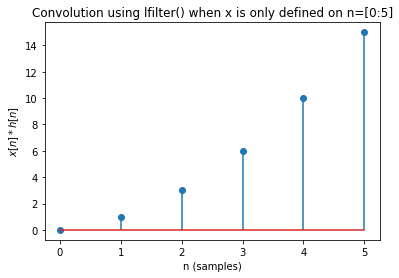

In [42]:
y = signal.lfilter(h,1.0,x)
ny = np.arange(0,6)

plt.stem(ny,y)
plt.xlabel("n (samples)")
plt.ylabel("$x[n] * h[n]$")
plt.title("Convolution using lfilter() when x is only defined on n=[0:5]")
plt.show()

If lfilter is to return the same result as conv(h,x), then the input to filter must contain 11 samples of x[n]. (Remember that conv returns a vector of length $N_x + N_h - 1$, where $N_x$ sit he length of x and $N_h$ is the length of h.)

### (g).
Define a vector x2 to contain $x[n]$ on the interval $0 \le n \le 10$, and use

\>> y2=signal.lfilter(h,1.0,x2);

to compute the convolution on this interval. Plot your results using plt.stem([0,1,2,3,4,5,6,7,8,9,10],y2) and verify that your plot agrees with figure 2.2.

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5]
[ 0.  1.  3.  6. 10. 15. 15. 14. 12.  9.  5.]


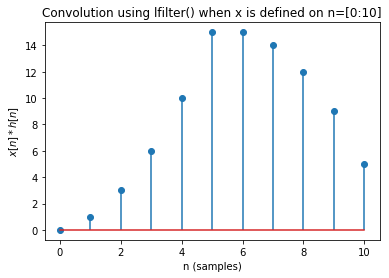

In [43]:
nx2 = np.arange(0,11)
x2 = [1  if val <= 5 else 0 for val in nx2]
print(x2)
print(h)
y2 = signal.lfilter(h,[1.0],x2)
print(y2)

plt.stem(nx2,y2)
plt.xlabel("n (samples)")
plt.ylabel("$x[n] * h[n]$")
plt.title("Convolution using lfilter() when x is defined on n=[0:10]")
plt.show()

Like np.conv, signal.lfilter can also be used to implement an LTI system which has a noncausal impulse response. Again, it is important to keep track of the indices of the input, impulse response, and output. To illustrate how, assume that $h[n]$ in Eq. (2.3) is replaced by $h[n+L]$ for some integer $L$. The convulution sum becomes

<center>$y_2[n] = \displaystyle\sum_{m=-\infty}^{\infty} h[m+L]x[n-m]$, </center>

which, upon substitution of $m' = m + L$, gives
<center>
$
\begin{align}
y_2[n] & = \displaystyle\sum_{m'=-\infty}^{\infty} h[m']x[n-(m'- L)] \\
& = \displaystyle\sum_{m'=-\infty}^{\infty} h[m']x[(n + L) - m'] \\
& = y[n + L].
\end{align}
$
</center>

In other words, an advance in the impulse response by $L$ samples merely advances the output by $L$ samples. For $L < 0$, this corresponds to a delay. Therefore, if $x$ contains $x[n]$ on the interval $0 \le n \le N_x - 1$ and $h$ contains $h[n]$ on the interval $-L \le n \le N_x - 1 - L$. Note that $y$ still has the same number of samples as $x$, only the samples represented by $y$ have advanced by $L$ samples.

### (h).

Consider the impulse response $h_2[n] =  h[n+5]$, where $h[n]$ is defined in Eq. (2.6). Store $h_2[n]$ on the interval $-5 \le n \le 0$ in the vector $h2$.

In [44]:
nh2 = np.arange(-5,1)
h2 = [0,1,2,3,4,5]
print(h2)

[0, 1, 2, 3, 4, 5]


### (i).

Execue the command y2 = lfilter(h2,1,x) and create a vector ny2 which contains indices of the samples of $y_2[n] = h_2[n] * x[n]$ stored in y2. Plot your result using plt.stem(ny2, y2). How does this plot compare with Figure 2.4?

[ 0.  1.  3.  6. 10. 15.]


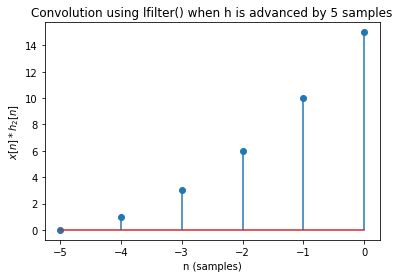

In [45]:
y2 = signal.lfilter(h2,[1.0],x)
print(y2)
plt.stem(n,y2)
plt.xlabel("n (samples)")
plt.ylabel("$x[n] * h_2[n]$")
plt.title("Convolution using lfilter() when h is advanced by 5 samples")
plt.show()

### (j).

Create a vector x2 such that lfilter(h2,[1.0],x2) returns all the nonzero samples of $y_2[n]$.

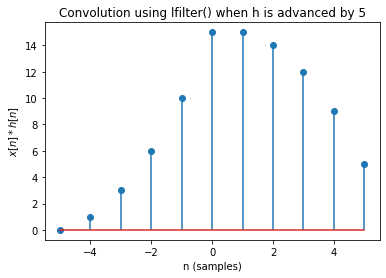

In [48]:
# Use x2 above because it fits the need.
ny2 = np.arange(-5,6)
y2 = signal.lfilter(h2, [1.0], x2)
plt.stem(ny2,y2)
plt.xlabel("n (samples)")
plt.ylabel("$x[n] * h[n]$")
plt.title("Convolution using lfilter() when h is advanced by 5")
plt.show()